# Part 3 Classification

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In this case, we only use `Age` and `EstimatedSalary` for independent variables and `Purchased` for dependent variables.

In [3]:
# Splitting the dataset into the dependent and independent variable
X = dataset.iloc[:, 2: -1].to_numpy()
y = dataset.iloc[:, -1].to_numpy()

In [4]:
# Splitting the dataset into the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

There are two reasons for feature scaling in this case:
- Some models are calculated based on Euclidean distance, which makes feature scaling necessary.
- All visualizations are drawn using $0.01$ resolution, so feature scaling makes graphing more efficient.

In [5]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## 3.1 Logistic Regression
### 3.1.1 Logistic Regression Intuition
The function for simple linear regression is $y=b_0+b_1x$. If we use the sigmoid function to transform this formula to:

$$p=\frac{1}{1+e^{-y}}$$

By using the log scale for both sides, we can get the formula of simple logistic regression:

$$\ln(\frac{p}{1-p})=b_0+b_1x$$

This model can calculate the predicted probability $\hat{p}$ for choosing $y=1$. For every point with the probability below 0.5, we predict it as $0$. Otherwise, we predict it as $1$.

### 3.1.2 Logistic Regression in Python
In `LogisticRegression`, we need to specify one hyperparameter for this case:
- `random_state`: The seed of the pseudo random number generator to use when shuffling the data.

In [6]:
# Fitting logistic regression into the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/Users/zhangyinghao/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [8]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 7, 25]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


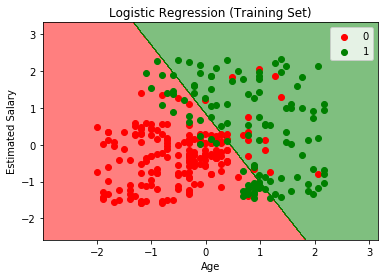

In [9]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


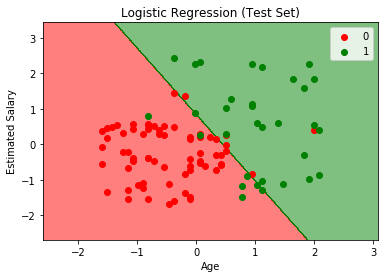

In [10]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The prediction boundary in these two graphs shows that logistic regression is a linear classifier.

## 3.2 K-Nearest Neighbors (K-NN)
### 3.2.1 K-NN Intuition
- **STEP 1**: Choose the number $K$ of neighbors
- **STEP 2**: Take the $K$ nearest neighbors of the new data point, according to the Euclidean distance. For example, for two data point $P_1(x_1, y_1)$ and $P_2(x_2, y_2)$, the Euclidean distance between $P_1$ and $P_2$ is:

$$\text{dist}=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

- **STEP 3**: Among these $K$ neighbors, count the number of data points in each category. 
- **STEP 4**: Assign the new data point to the category where you counted the most neighbors.

### 3.2.2 K-NN in Python
In `KNeighborsClassifier`, we need to specify three hyperparameters for this case:
- `n_neighbors`: Number of neighbors to use by default for kneighbors queries.
- `metric`: The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
- `p`: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.

In [11]:
# Fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [13]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


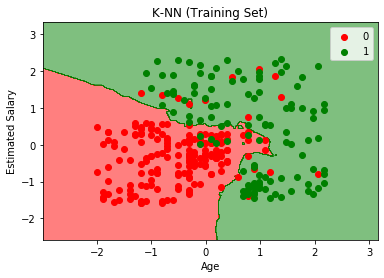

In [14]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('K-NN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


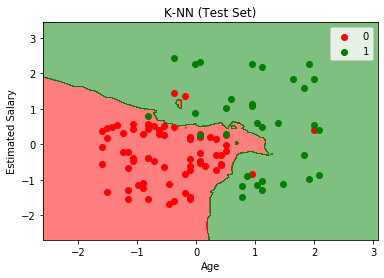

In [15]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('K-NN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The graphs show that K-NN is a nonlinear classifier with a coarse decision boundary.

## 3.3 Support Vector Machine (SVM)
### 3.3.1 SVM Intuition
The SVM find a hyperplane which can maximize the margin between two support vectors. The reason why SVM is so special is that SVM considers the extreme case near to the boundary as the support vector. 

![3-3-1](3-3-1.png)

### 3.3.2 SVM in Python
In `SVC`, we need to specify two hyperparamters for this case:
- `kernel`: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
- `random_state`: The seed of the pseudo random number generator used when shuffling the data for probability estimates.

In [16]:
# Fitting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [18]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 7, 25]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


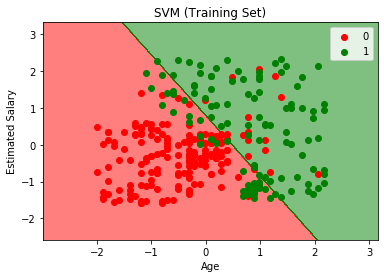

In [19]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


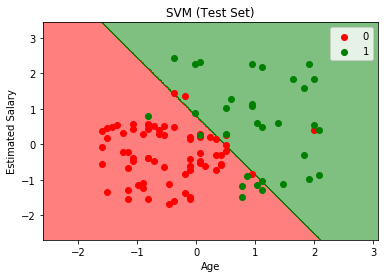

In [20]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('SVM (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3.4 Kernel SVM
### 3.4.1 Kernel SVM Intuition
The assumption for SVM is that the dataset is linearly separable. But when the dataset is nonlinearly separable, we should use the kernel to upgrade the dataset into a higher dimension. We can use a function to project the dataset into a higher dimension, which can make the dataset linearly separable. The problem is that mapping to a higher dimensional space can be highly compute-intensive. Thus, we use the kernel trick to deal with this issue.

**The Gaussian RBF Kernel**:

$$K(\vec{x}, \vec{l}^{i})=e^{-\frac{\|\vec{x}-\vec{l}^{i}\|^2}{2\sigma^2}}$$

in three dimensional space, where $\vec{l}$ is the landmark of the center of the curve and $K$ represents the vertical height $\|\vec{x}-\vec{l}^{i}\|$ represents the distance between the center and the point. The point outside the boundary will have a value of $0$, whereas the value inside the boundary will have a value higher than $0$. The bigger $\sigma$ is, the bigger the boundary is.

**Types of Kernel Functions**:
- Gaussian RBF Kernel:

$$K(\vec{x}, \vec{l}^{i})=e^{-\frac{\|\vec{x}-\vec{l}^{i}\|^2}{2\sigma^2}}$$

- Sigmoid Kernel:

$$K(X, Y)=\tanh{(\gamma\cdot X^TY+r)}$$

- Polynomial Kernel:

$$K(X, Y)=(\gamma\cdot X^TY+r)^d, \gamma>0$$

### 3.4.2 Kernel SVM in Python

In [21]:
# Fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [23]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


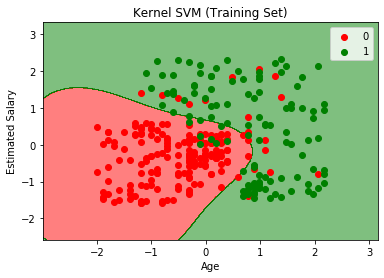

In [24]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Kernel SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


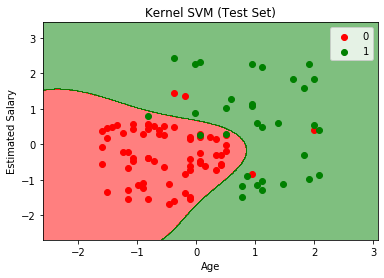

In [25]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Kernel SVM (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In the graphs above, we get a nonlinear and smooth decision boundary.

## 3.5 Naive Bayes
### 3.5.1 Bayes Theorem

$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}$$

### 3.5.2 Naive Bayes Classifier
- **STEP 1**: Calculate $P(\text{Walks}|X)$

$$P(\text{Walks}|X)=\frac{P(X|\text{Walks})\cdot P(\text{Walks})}{P(X)}$$

where $P(\text{Walks})$ is the prior probability, $P(X)$ is the marginal likelihood, $P(X|\text{Walks})$ is the likelihood, and $P(\text{Walks}|X)$ is the posterior likelihood. 

$$P(\text{Walks})=\frac{\text{Number of Walkers}}{\text{Total Observations}}$$

$$P(X)=\frac{\text{Number of Similar Observations}}{\text{Total Observations}}$$

$$P(\text{Walks})=\frac{\text{Number of Similar Observations among those who Walk}}{\text{Total Number of Walkers}}$$

- **STEP 2**: Calculate $P(\text{Drives}|X)$

$$P(\text{Drives}|X)=\frac{P(X|\text{Drives})\cdot P(\text{Drives})}{P(X)}$$

where $P(\text{Drives})$ is the prior probability, $P(X)$ is the marginal likelihood, $P(X|\text{Drives})$ is the likelihood, and $P(\text{Drives}|X)$ is the posterior likelihood. 

**Why Naive?**

The Bayes Theorem requires independence between two variables. In this scenario, `Age` and `Salary` must be independent. 

### 3.5.3 Naive Bayes in Python

In [26]:
# Fitting naive Bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [28]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 5, 27]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


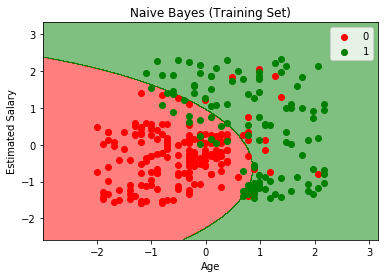

In [29]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


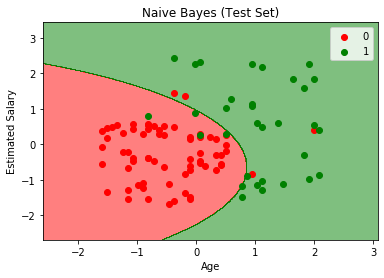

In [30]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

It seems that naive bayes is a nonlinear classifier.

## 3.6 Decision Tree Classification
### 3.6.1 Decision Tree Classification Intuition
![3-6-2](3-6-2.png)

### 3.6.2 Decision Tree Classification in Python
Decision Tree is not an algorithm based on the Euclidean distance, so we don't need to conduct feature scaling. However, when we do visualization, we need to perform feature scaling to make our algorithm run faster.  

In `DecisionTreeClassifier`, we need to specify two hyperparamters for this case:
- `criterion`: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- `random_state`: If int, `random_state` is the seed used by the random number generator.

In [31]:
# Fitting decision tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [32]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [33]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[61,  7],
       [ 3, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


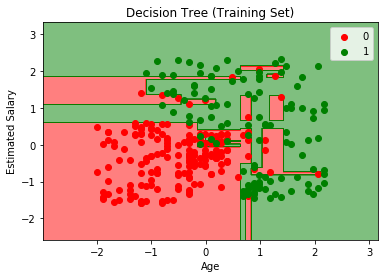

In [34]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


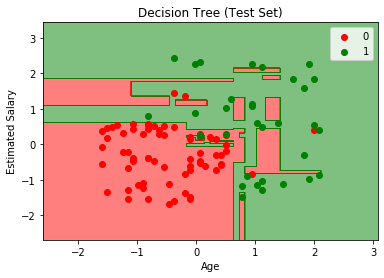

In [35]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Decision Tree (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

From the graphs above, the model contains only horizontal and vertical lines. It may have the risk of overfitting.

## 3.7 Random Forest Classification
### 3.7.1 Random Forest Classification Intuition
**Ensemble Learning**:

Take multiple machine learning algorithms and put it together to create one bigger machine learning algorithm. 

**How Random Forest Happens**:

- **STEP 1**: Pick at random $K$ data points from the training set.
- **STEP 2**: Build the decision tree associated to these $K$ data points.
- **STEP 3**: Choose the number $Ntree$ of trees you want to build and repeat **STEP 1&2**. 
- **STEP 4**: For a new data point, make each one of your $Ntree$ trees predict the category to which the data points belongs, and assign the new data point to the category that wins the majority vote. 


### 3.7.2 Random Forest Classification in Python
In `RandomForestClassifier`, we need to specify three hyperparameters for this case:

- `n_estimators`: The number of trees in the forest.
- `criterion`: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- `random_state`: `random_state` is the seed used by the random number generator.

In [36]:
# Fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [38]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 5, 27]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


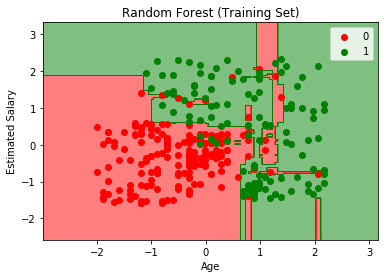

In [39]:
# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


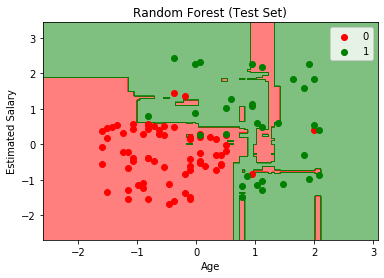

In [40]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.5, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The graphs show some degrees of overfitting for some data points. From all of the results above, the kernel svm might be the best classifier for this case. 

## 3.8 Evaluating Classification Models Performance
### 3.8.1 False Positives & False Negatives
- False Positive: We predict it as a positive outcome but it's false (Type I Error). 
- False Negative: We predict it as a negative outcome but it's false (Type II Error).

In common sense, Type II Error is more dangerous than Type I Error.

### 3.8.2 Confusion Matrix
- True Positive: $\hat{y}=1, y=1$
- True Negative: $\hat{y}=0, y=0$
- False Positive (Type I Error): $\hat{y}=1, y=0$
- False Negative (Type II Error): $\hat{y}=0, y=1$

The more you have in the first diagnal, the better; the more you have in the second diagnal, the worse.

**Calculate two rates**:

$$\text{Accuracy Rate} = \frac{\text{Correct}}{\text{Total}}$$

$$\text{Error Rate} = \frac{\text{Wrong}}{\text{Total}}$$

### 3.8.3 Accuracy Paradox
If we don't choose any models, such as predicting $1$ or $0$ for all, our accuracy may increase compared to using a model. 

### 3.8.4 Cumulative Accuracy Profile (CAP) Curve
Suppose we have $10\%$ customers in the market who will buy the product.
![3-8-1](3-8-1.png)

### 3.8.5 CAP Curve Analysis
We draw a $50\%$ line in `total contacted` and we get $x\%$ in `Purchased`. Then we use a rule of thumb:
- If $x<60\%$, then: rubbish
- If $60\%<x<70\%$, then: poor
- If $70\%<x<80\%$, then: good
- If $80\%<x<90\%$, then: very good
- If $90\%<x<100\%$, then: too good (be careful of overfitting)

## 3.9 Conclusion
### 3.9.1 What are the pros and cons of each model ?

### 3.9.2 How do I know which model to choose for my problem ?
Same as for regression models, you first need to figure out whether your problem is linear or non linear. You will learn how to do that in Part 10 - Model Selection. Then:

- If your problem is linear, you should go for Logistic Regression or SVM.

- If your problem is non linear, you should go for K-NN, Naive Bayes, Decision Tree or Random Forest.

Then which one should you choose in each case? You will learn that in Part 10 - Model Selection with k-Fold Cross Validation.

Then from a business point of view, you would rather use:

- Logistic Regression or Naive Bayes when you want to rank your predictions by their probability. For example if you want to rank your customers from the highest probability that they buy a certain product, to the lowest probability. Eventually that allows you to target your marketing campaigns. And of course for this type of business problem, you should use Logistic Regression if your problem is linear, and Naive Bayes if your problem is non linear.

- SVM when you want to predict to which segment your customers belong to. Segments can be any kind of segments, for example some market segments you identified earlier with clustering.

- Decision Tree when you want to have clear interpretation of your model results.

- Random Forest when you are just looking for high performance with less need for interpretation. 

### 3.9.3 How can I improve each of these models?

Same answer as in Part 2: 

In Part 10 - Model Selection, you will find the second section dedicated to Parameter Tuning, that will allow you to improve the performance of your models, by tuning them. You probably already noticed that each model is composed of two types of parameters:

- the parameters that are learnt, for example the coefficients in Linear Regression,
- the hyperparameters.

The hyperparameters are the parameters that are not learnt and that are fixed values inside the model equations. For example, the regularization parameter `lambda` or the penalty parameter `C` are hyperparameters. So far we used the default value of these hyperparameters, and we haven't searched for their optimal value so that your model reaches even higher performance. Finding their optimal value is exactly what Parameter Tuning is about. So for those of you already interested in improving your model performance and doing some parameter tuning, feel free to jump directly to Part 10 - Model Selection.